# 01 - Exploratory Data Analysis


In [50]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Apply the default theme
sns.set_theme()

In [2]:
# import track data
df = pd.read_csv('./data/playlist_tracks.csv')
playlist_data = pd.read_csv('./data/playlists.csv')

# merging the playlist info
df = df.merge(playlist_data, on='playlist_id')
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/dc3f5560d882d3f9...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-10.833,1,0.0923,0.63300,0.89000,0.0972,0.320,126.031,4,Electro chill
1,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",True,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-8.091,0,0.0485,0.13500,0.00216,0.3110,0.686,120.029,4,Electro chill
2,https://p.scdn.co/mp3-preview/e54ac6ee0aa018cf...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.800,0,0.0543,0.16900,0.00244,0.2090,0.293,116.949,4,Electro chill
3,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-6.751,0,0.0462,0.00926,0.00538,0.1590,0.310,119.996,4,Electro chill
4,https://p.scdn.co/mp3-preview/bacd8fab60c68555...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-17.531,1,0.0884,0.08500,0.87000,0.1110,0.494,114.989,4,Electro chill


In [3]:
# number of playlist
print('Number of playlists:', df['playlist_id'].nunique())

# number of tracks
print('Number of tracks:', df['id'].nunique())

Number of playlists: 5
Number of tracks: 562


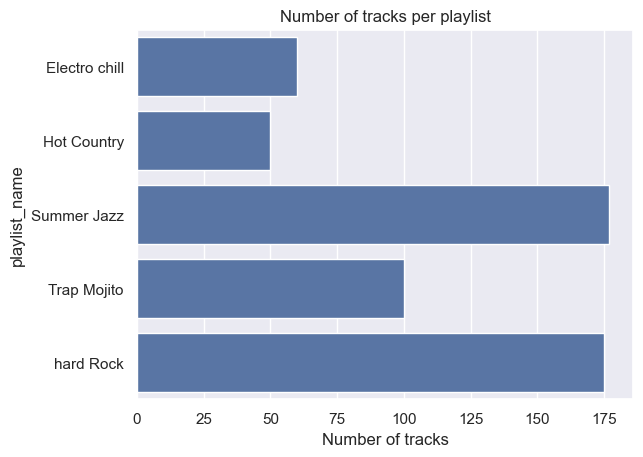

In [4]:
# number of tracks per playlist. As the numbfer of tracks is not the same, we will make sure to test for variance
sns.barplot(df.groupby('playlist_name')['id'].nunique().rename('Number of tracks'), orient='h')
plt.title('Number of tracks per playlist');

**Audio features definitions:**

- **tempo**: The overall estimated tempo of a track in beats per minute (BPM).

- **time_signature**: An estimated time signature of the track (3 to 7).

- **key**: The key the track is in (0 = C, 1 = C♯/D♭, ..., 11 = B, -1 if no key detected).

- **mode**: Modality of the track (1 = major, 0 = minor).

- **acousticness**: Confidence measure (0.0 to 1.0) of whether the track is acoustic.

- **danceability**: Describes how suitable a track is for dancing (0.0 to 1.0).

- **energy**: Measure of intensity and activity (0.0 to 1.0). Typically, energetic tracks feel fast, loud, and noisy.

- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context.

- **liveness**: Detects the presence of an audience in the recording (0.0 to 1.0).

- **loudness**: Overall loudness of the track in decibels (dB).

- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


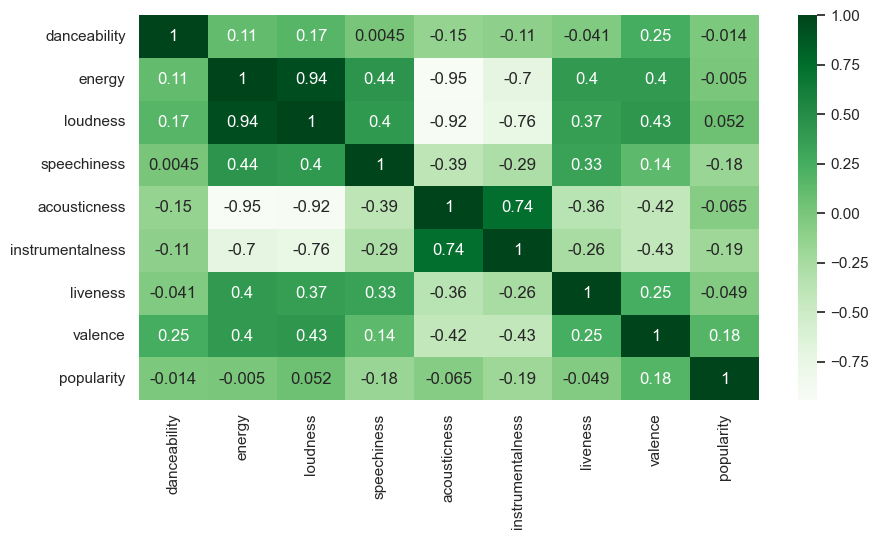

In [5]:
# checking if the audio features are correlated (as well as the popularity)
df_features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'popularity', 'playlist_name']];

plt.figure(figsize=(10,5))
sns.heatmap(df_features.drop('playlist_name', axis=1).corr(), annot=True, cmap='Greens');

We note:

- Energy and Loudness are very highly correlated
- Instrumentalness and acousticness are very highly correlated
- Energy, Loudness, liveness and valence are postively correlated, and negatively correlated to acousticness and instrumentalness
- speechiness is negatively correlated to instrumentalness (but even more to acousticness?)
- it seems like popularity is a little bit correlated with valence. Happy songs are more popular?


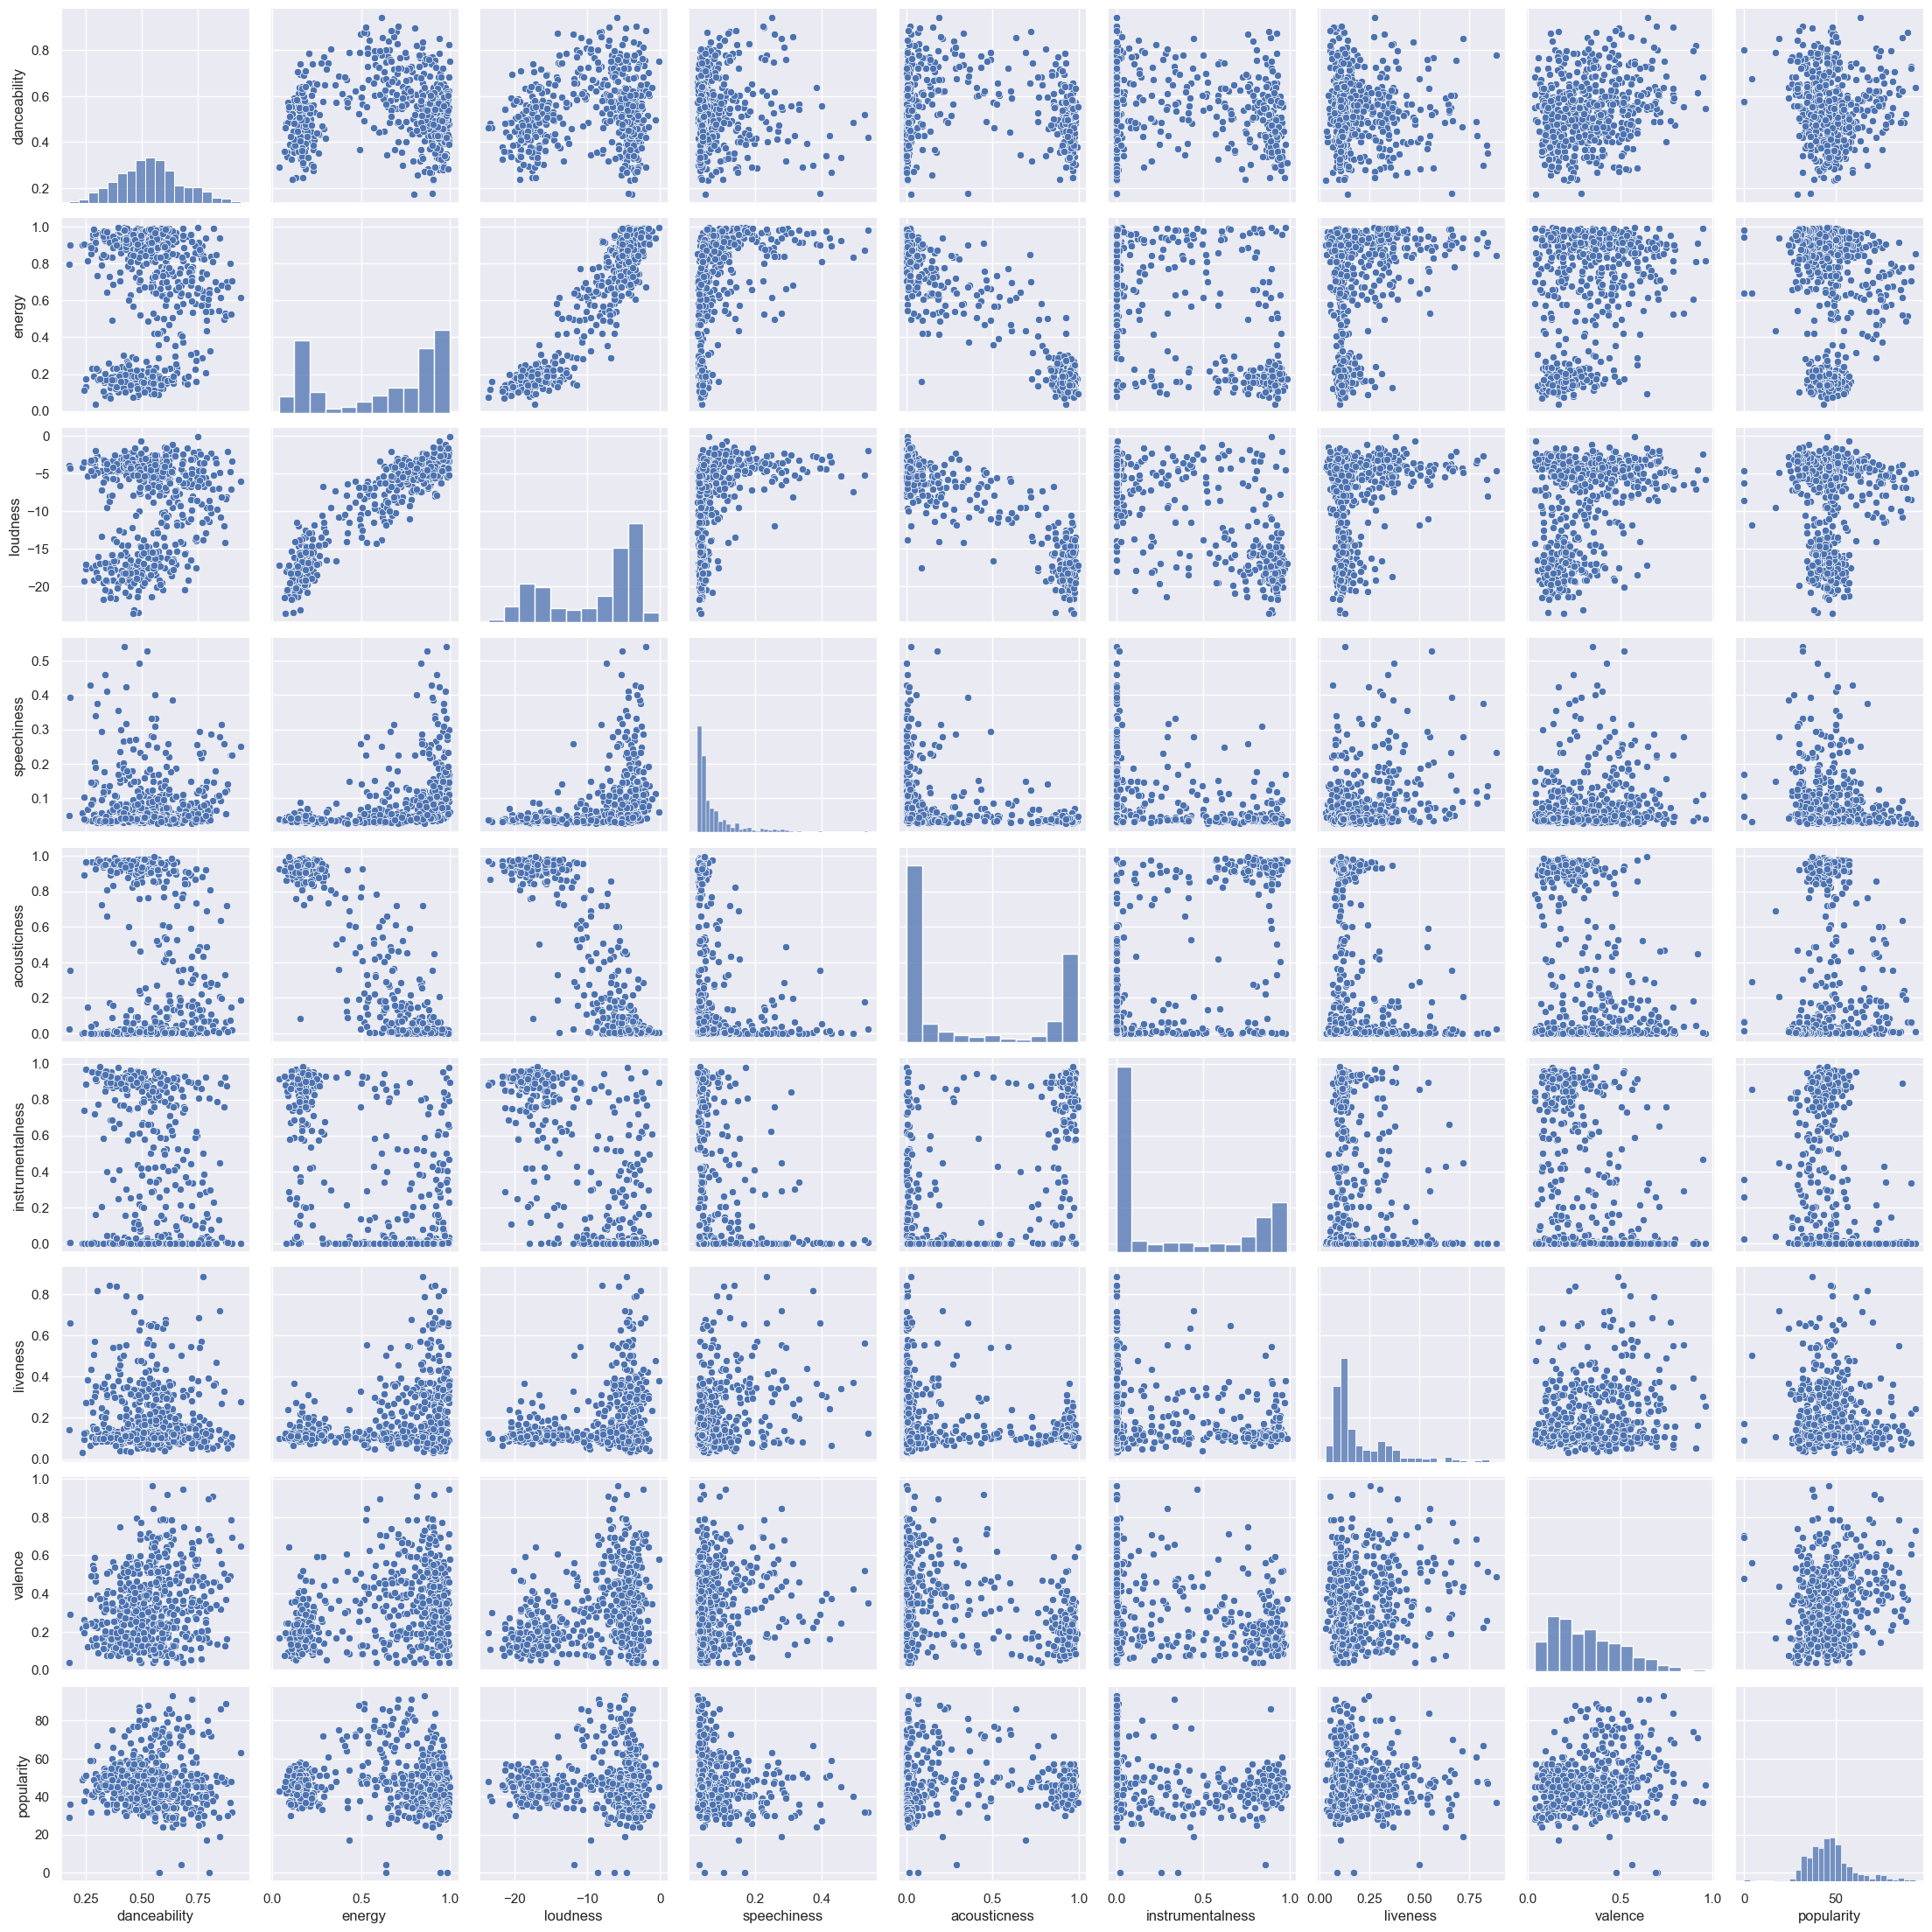

In [6]:
# pairplot of the audio features
sns.pairplot(df_features.drop('playlist_name', axis=1));

- Some features look gaussian (danceability, popularity, valence): these are the one representing continous values
- some are more bimodal (acousticness, instrumentalness): these are the one from binary classification


In [7]:
# Group by playlist_name and calculate the mean of the audio features
df_features.groupby('playlist_name').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,popularity
playlist_name,,,,,,,,,
Electro chill,0.702750,0.616033,-9.647400,0.068977,0.333652,0.311981,0.151462,0.309368,52.450000
Hot Country,0.569420,0.668080,-5.875820,0.039002,0.222653,0.004490,0.188878,0.502780,71.760000
Summer Jazz,0.481780,0.174577,-17.285475,0.037636,0.931785,0.761637,0.125217,0.209166,44.847458
Trap Mojito,0.646440,0.861430,-4.081270,0.148043,0.057377,0.247051,0.250285,0.340178,36.010000
hard Rock,0.464497,0.897211,-4.343314,0.106729,0.008626,0.026262,0.258796,0.386999,47.765714


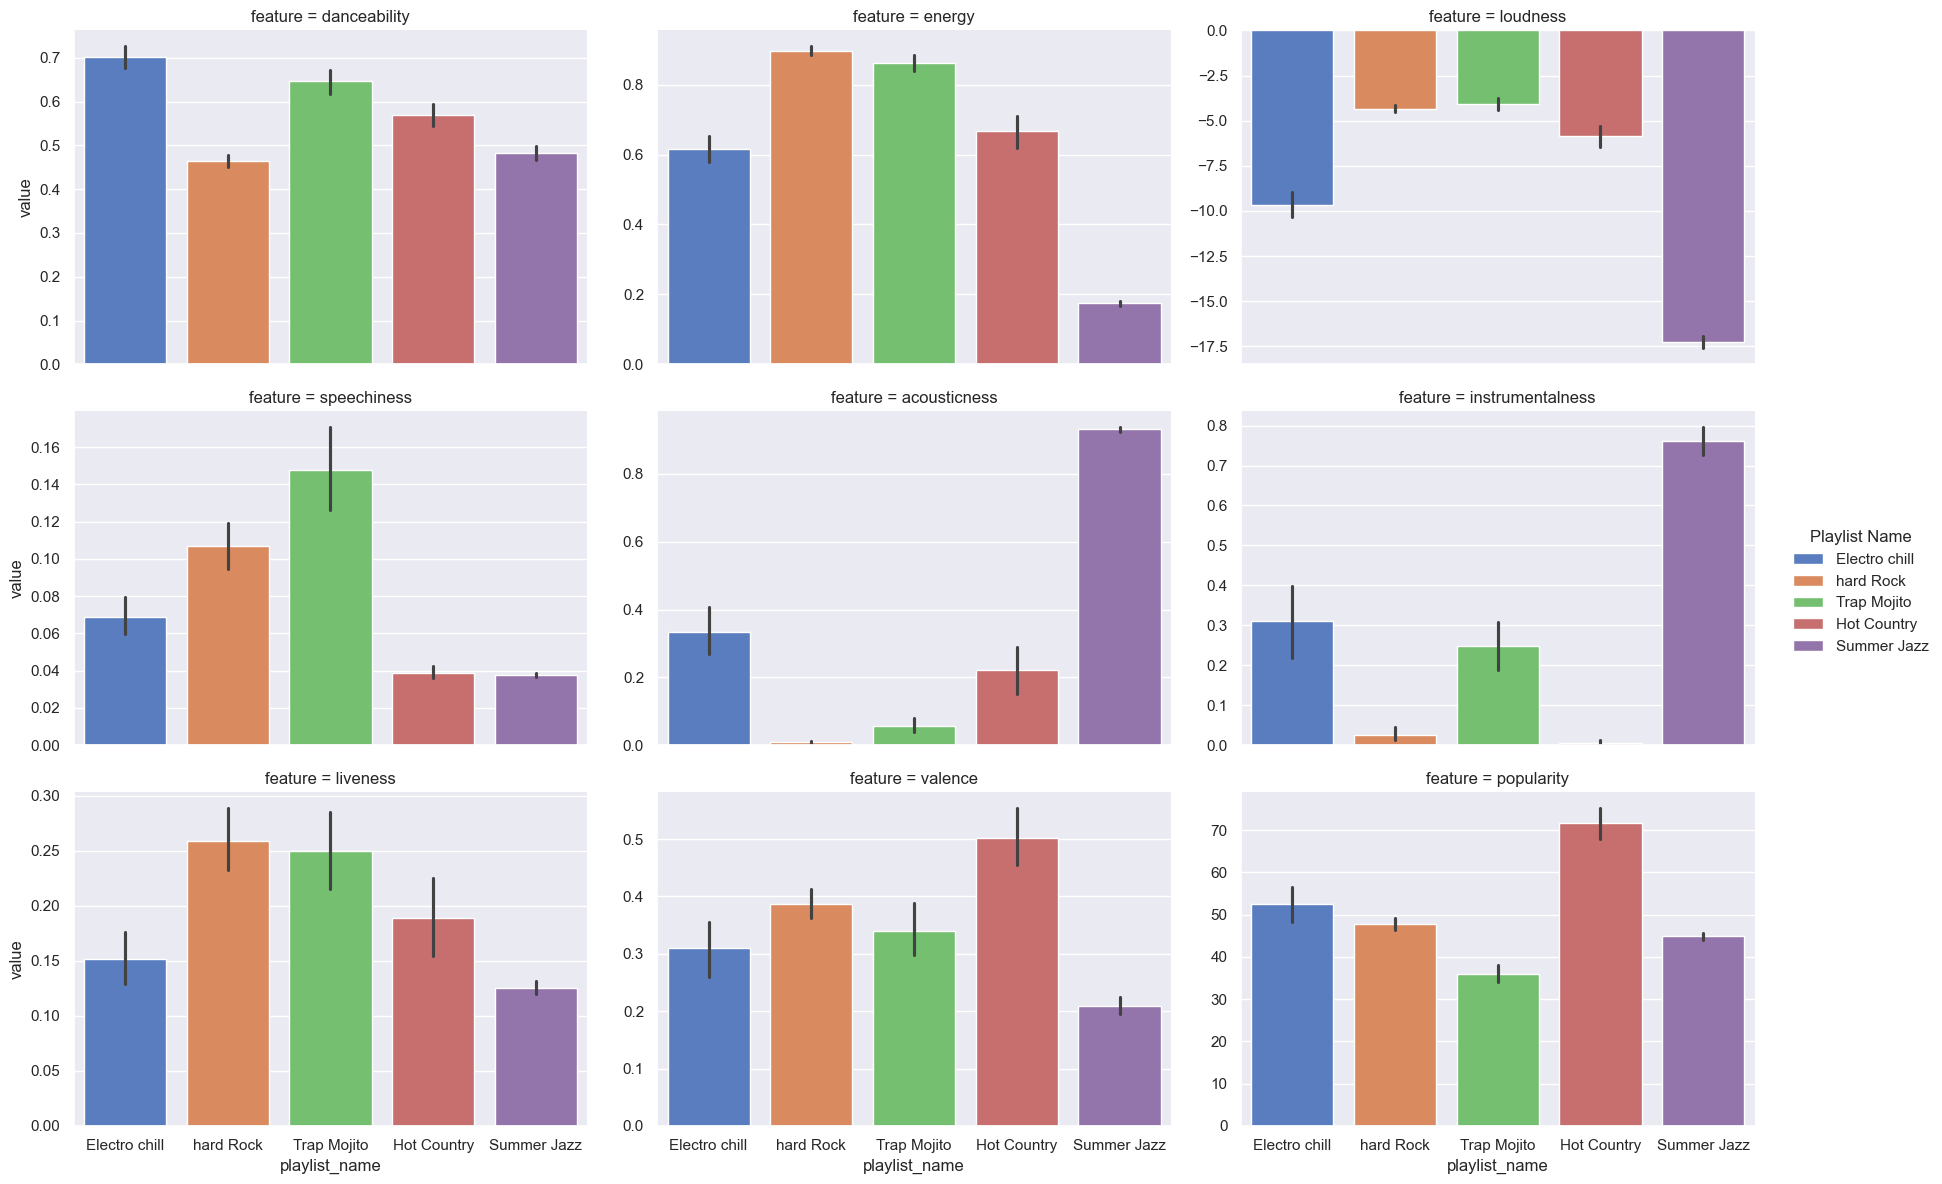

In [8]:
# let's look at average popularity per playlist
df_melted = df_features.melt(id_vars='playlist_name', var_name='feature', value_name='value')

# facet grid
# Creating the FacetGrid with a legend and specifying hue_order
g = sns.FacetGrid(df_melted, col="feature", col_wrap=3, height=4, aspect=1.5, sharey=False, hue='playlist_name', palette='muted')
g.map(sns.barplot, "playlist_name", "value", order=None)

# Adding the legend
g.add_legend(title="Playlist Name")
g.tight_layout()
plt.show();

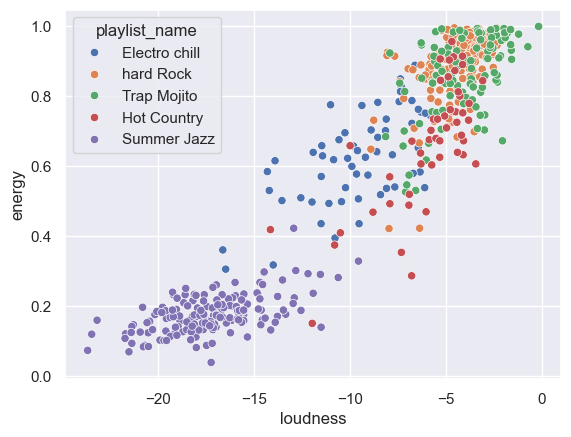

In [10]:
# Let's dive deeper into loudness and energy
sns.scatterplot(data=df_features, x='loudness', y='energy', hue='playlist_name');

It does seem like loudness and energy are highly correlated, and we can easily start to identify clusters of loudness / energy level for the different genre we have!


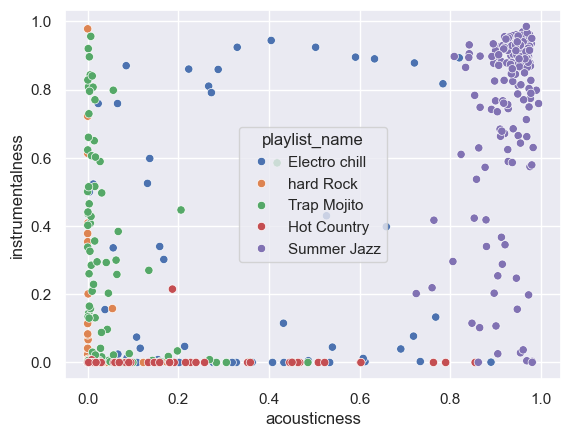

In [11]:
# we can also compare the acousticness and instrumentalness
sns.scatterplot(data=df_features, x='acousticness', y='instrumentalness', hue='playlist_name');

That seems again to be a good separator for our playlists


## We can run an stastical test for fun


### Let's see if energy between summer jazz and hard rock is stastically different


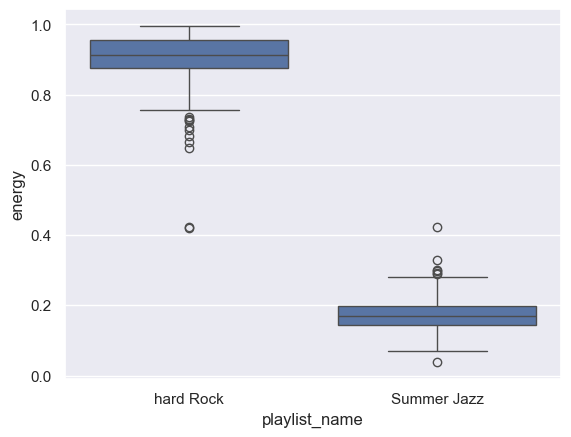

In [20]:
# boxplot of energy level for Summer Jazz and hard Rock
sns.boxplot(data=df_features[df_features['playlist_name'].isin(['Summer Jazz', 'hard Rock'])], x='playlist_name', y='energy');

In [24]:
# gaussian test
def shapiro_test(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0)')
    else:
        print('Sample does not look Gaussian (We reject H0)')


In [25]:
summer_jazz_energy = df[df.playlist_name == 'Summer Jazz']['energy']
hard_rock_energy = df[df.playlist_name == 'hard Rock']['energy']

print('Summer jazz')
shapiro_test(summer_jazz_energy)
print('Hard rock')
shapiro_test(hard_rock_energy)

Summer jazz
Statistics=0.964, p=0.000
Sample does not look Gaussian (We reject H0)
Hard rock
Statistics=0.794, p=0.000
Sample does not look Gaussian (We reject H0)


In [26]:
# summarize
print(f'Summer Jazz: median = {summer_jazz_energy.median()} stdv = {summer_jazz_energy.std()}')
print(f'Hard Rock: median = {hard_rock_energy.median()} stdv = {hard_rock_energy.std()}')

Summer Jazz: median = 0.17 stdv = 0.05245192981134986
Hard Rock: median = 0.914 stdv = 0.0869839850877192


In [27]:
# mannwhitneyu test
def mannwhitneyu_test(data1, data2, alternative='two-sided', alpha=0.05):

    stat, p = stats.mannwhitneyu(data1, data2, alternative=alternative)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        if alternative == 'two-sided':
            print('Different distribution (reject H0)')
        elif alternative == 'greater':
            print('First distribution greater (reject H0)')
        else:
            print('Second distribution greater (reject H0)')

In [28]:
# running the test
mannwhitneyu_test(summer_jazz_energy, hard_rock_energy, alternative='less')

Statistics=1.500, p=0.000
Second distribution greater (reject H0)


### Let's see if the popularity is different between the different groups


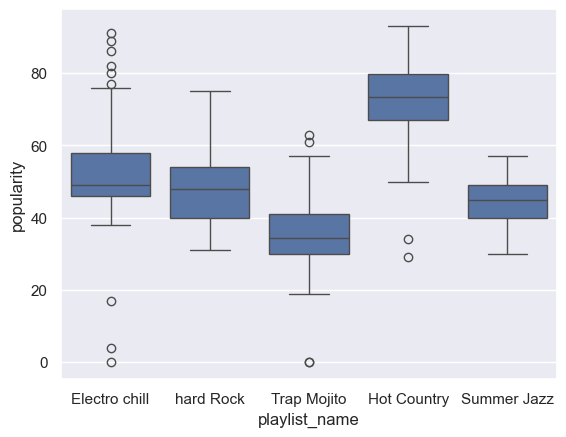

In [29]:
# boxplot of popularity level
sns.boxplot(data=df_features, x='playlist_name', y='popularity');

- Null Hypothesis: The mean popularity of tracks is the same across all playlists.
- Alternative Hypothesis: At least one playlist has a different mean popularity compared to the others.


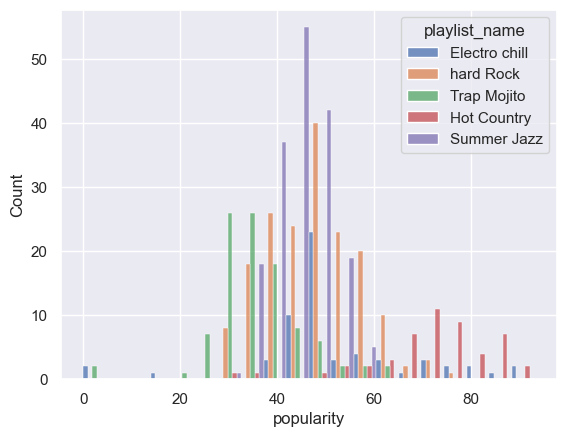

In [36]:
sns.histplot(df_features, x='popularity', hue='playlist_name', bins=20, multiple='dodge');

In [39]:
# testing for normality
for playlist_name in df_features['playlist_name'].unique():
    print('\n## ' + playlist_name)
    shapiro_test(df_features[df_features['playlist_name'] == playlist_name]['popularity'])


## Electro chill
Statistics=0.871, p=0.000
Sample does not look Gaussian (We reject H0)

## hard Rock
Statistics=0.983, p=0.029
Sample does not look Gaussian (We reject H0)

## Trap Mojito
Statistics=0.930, p=0.000
Sample does not look Gaussian (We reject H0)

## Hot Country
Statistics=0.914, p=0.001
Sample does not look Gaussian (We reject H0)

## Summer Jazz
Statistics=0.988, p=0.119
Sample looks Gaussian (We fail to reject H0)


the Anova test is somehow robust to normality. Since we also have a large number of tracks per playlist, we will pursue with this test.


In [47]:
# Extract the popularity data for each playlist
playlists_popularity = [df_features[df_features['playlist_name'] == name]['popularity'].values for name in df_features['playlist_name'].unique()]

for play in playlists_popularity:
    print(len(play))

60
175
100
50
177


In [48]:
# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*playlists_popularity)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

ANOVA F-statistic: 115.03396369437644
ANOVA p-value: 1.85950021152492e-71


Since the p-value is very low, we can reject H0 and conclude that there are enough evidence to reject the fact that all playlists have the same average popularity.


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1       group2   meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
Electro chill Hot Country    19.31    0.0  14.1075  24.5125   True
Electro chill Summer Jazz  -7.6025    0.0 -11.6613  -3.5438   True
Electro chill Trap Mojito   -16.44    0.0 -20.8767 -12.0033   True
Electro chill   hard Rock  -4.6843 0.0146  -8.7489  -0.6197   True
  Hot Country Summer Jazz -26.9125    0.0 -31.2639 -22.5612   True
  Hot Country Trap Mojito   -35.75    0.0 -40.4559 -31.0441   True
  Hot Country   hard Rock -23.9943    0.0 -28.3511 -19.6375   True
  Summer Jazz Trap Mojito  -8.8375    0.0 -12.2363  -5.4386   True
  Summer Jazz   hard Rock   2.9183 0.0473   0.0219   5.8146   True
  Trap Mojito   hard Rock  11.7557    0.0   8.3498  15.1616   True
------------------------------------------------------------------


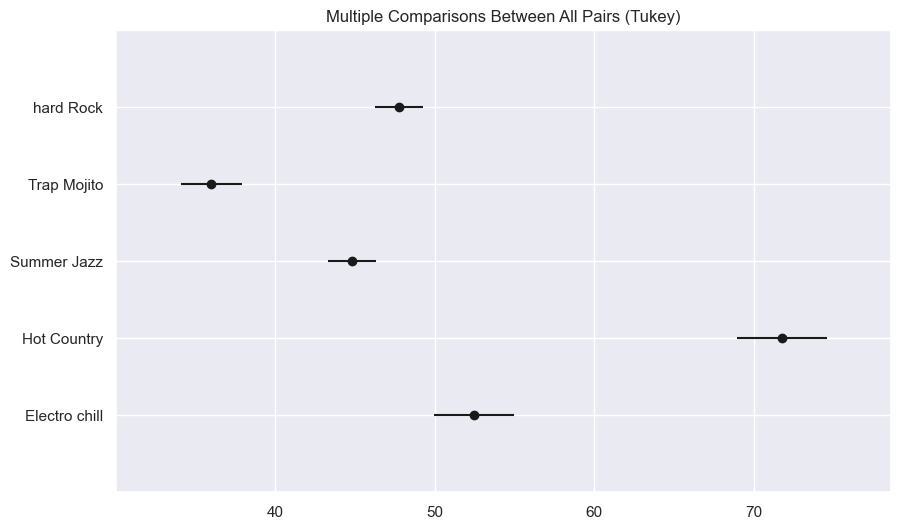

In [51]:
# Assuming df_features contains 'playlist_name' and 'popularity'
tukey = pairwise_tukeyhsd(endog=df_features['popularity'], 
            groups=df_features['playlist_name'], 
            alpha=0.05)

print(tukey)
tukey.plot_simultaneous()  # Plotting the confidence intervals
plt.show()

According to this post - hoc test, it seems like pairwise, all playlists have difffent popularity on average.
